# Faktor apakah yang menjual sebuah mobil?

Kita akan melakukan sebuah analisis di perusahaan Crankshaft List yangmana menyediakan situs web iklan kendaraan gratis yang ditayangkan setiap hari. Tujuan dari analisis ini untuk menentukan faktor-faktor apa saja yang memengaruhi harga sebuah kendaraan.

Mengimport library yang diperlukan.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. General Info

### Memuat Data

In [21]:
df = pd.read_csv('/datasets/vehicles_us.csv')

In [22]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


### Mengeksplorasi Data Awal

Dataset yang kita miliki berisi kolom-kolom berikut:

- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, disel, dan lain-lain.
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan  
- `transmission`
- `paint_color`
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
- `date_posted` — tanggal iklan ditayangkan
- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus


In [23]:
df.info() # menampilkan informasi/rangkuman umum tentang DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


**Kesimpulan**

Berdasarkan informasi umum dari file, kita memiliki 13 kolom dan 51525 baris. Beberapa kolom memiliki nilai yang hilang, selain itu pada kolom 'date_posted' yang memiliki tipe data object, sehingga perlu diubah menjadi tipe date/time. Setelah menampilkan 5 baris pertama dari file, kita bisa lihat terdapat beberapa nilai kosong yangmana akan dilakukan eksekusi ditahap selanjutnya.

# 2. Data Pre-Processing

### Memperbaiki Tipe Data
Kita akan mengubah tipe data object menjadi tipe date/time pada kolom `date_posted`.

In [24]:
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')

Mari kita cek tipe datanya.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    47906 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     46265 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      43633 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        25572 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB


Kita telah berhasil mengubah tipe data menjadi tipe date/time.

### Mengatasi Nilai-Nilai yang Hilang

Kita tampilkan kembali dataframe.

In [26]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


### Kolom 'is_4wd'

Cek isi dari kolom 'is_4wd'

In [27]:
df['is_4wd'].unique()

array([ 1., nan])

Pada kolom tersebut terdapat nilai 1 dan nilai kosong (NaN). Kita harus mengisi nilai NaN dengan angka 0, kemudian mengubah nilai dalam kolom tersebut menjadi tipe Boolean. 
Angka 1 adalah True, dan 0 adalah False.

In [28]:
df['is_4wd'] = df['is_4wd'].fillna(0) #mengisi NaN dengan 0
df['is_4wd'] = df['is_4wd'].astype('bool')

Mengecek apakah sudah menjadi tipe Boolean.

In [29]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,False,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,False,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,True,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,True,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17


In [30]:
df['is_4wd'].unique()

array([ True, False])

### Kolom 'type'

Cek isi dari kolom 'type'.

In [31]:
df['type'].unique()

array(['SUV', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

Terdapat kata dengan huruf kapital yaitu 'SUV', sehingga kita perlu mmebuat menjadi lower.

In [32]:
df['type'] = df['type'].str.lower()
df['type'].unique()

array(['suv', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

kolom 'type' berhasil.

### Kolom 'transmission'

Cek isi kolom 'transmission'.

In [33]:
df['transmission'].unique()

array(['automatic', 'manual', 'other'], dtype=object)

Kolom ini tidak ada masalah.

### Kolom 'cylinder'

Cek isi kolom 'cylinders'.

In [34]:
df['cylinders'].unique()

array([ 6.,  4.,  8., nan,  5., 10.,  3., 12.])

Kolom 'cylinders' memiliki beberapa nilai kosong, sehingga kita perlu mengisi dengan median.

In [35]:
median_cylinders = df['cylinders'].median()
df['cylinders'] = df['cylinders'].fillna(median_cylinders)

In [36]:
# Memastikan bahwa tidak ada nilai kosong di kolom 'cylinders'
df['cylinders'].isnull().sum()

0

### Kolom 'model_year'

Mengecek isi kolom dan mengisi nilai yang hilang dengan median.

In [37]:
df['model_year'].unique()

array([2011.,   nan, 2013., 2003., 2017., 2014., 2015., 2012., 2008.,
       2018., 2009., 2010., 2007., 2004., 2005., 2001., 2006., 1966.,
       1994., 2019., 2000., 2016., 1993., 1999., 1997., 2002., 1981.,
       1995., 1996., 1975., 1998., 1985., 1977., 1987., 1974., 1990.,
       1992., 1991., 1972., 1967., 1988., 1969., 1989., 1978., 1965.,
       1979., 1968., 1986., 1980., 1964., 1963., 1984., 1982., 1973.,
       1970., 1955., 1971., 1976., 1983., 1954., 1962., 1948., 1960.,
       1908., 1961., 1936., 1949., 1958., 1929.])

In [38]:
df['model_year'].isnull().sum()

3619

Terdapat 3619 data kosong pada kolom 'model_year'

In [39]:
# Mengisi nilai yang hilang dengan median
median_model_year = df['model_year'].median()
df['model_year'] = df['model_year'].fillna(median_model_year)

In [40]:
df['model_year'].isnull().sum()

0

### Kolom 'odometer'

Mengecek isi kolom dan mengisi nilai yang hilang dengan median.

In [41]:
df['odometer'].isnull().sum()

7892

In [42]:
df['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

Berdasarkan informasi di atas, kita bisa melihat terdapat nilai maximum 990000 yang bisa dikatakan nilainya terlalu jauh. Kita bisa katakan bahwa terdapat outlier pada kolom 'odometer' sehingga untuk mengisi nilai yang hilang, kita gunakan median.

In [43]:
median_odometer = df['odometer'].median()
df['odometer'] = df['odometer'].fillna(median_odometer)

In [44]:
df['odometer'].isnull().sum()

0

### Memperbaiki Kualitas Data

Kita akan memperbaiki kualitas data dengan menambahkan beberapa kolom.

In [47]:
# Menambahkan nilai waktu dan tanggal pada saat iklan ditayangkan
df['weekday'] = df['date_posted'].dt.weekday
df['month'] = df['date_posted'].dt.month_name()
df['year'] = df['date_posted'].dt.year

df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19,5,June,2018
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,October,2018
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,February,2019
3,1500,2003.0,ford f-150,fair,8.0,gas,113000.0,automatic,pickup,NaN,False,2019-03-22,9,4,March,2019
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,April,2019


In [48]:
# Menambahkan usia kendaraan saat iklan ditayangkan
df['age_car'] = df['year'] - df['model_year']
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,age_car
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19,5,June,2018,7.0
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,October,2018,7.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,February,2019,6.0
3,1500,2003.0,ford f-150,fair,8.0,gas,113000.0,automatic,pickup,NaN,False,2019-03-22,9,4,March,2019,16.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,April,2019,2.0


In [53]:
# Tambahkan jarak tempuh rata-rata kendaraan per tahun 
df['avr_dist'] = round(df['odometer'] / df['age_car'])
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,age_car,avr_dist
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19,5,June,2018,7.0,20714.0
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,October,2018,7.0,12672.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,February,2019,6.0,18333.0
3,1500,2003.0,ford f-150,fair,8.0,gas,113000.0,automatic,pickup,NaN,False,2019-03-22,9,4,March,2019,16.0,7062.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,April,2019,2.0,40452.0


kita akan mengganti isi kolom 'condition' dengan sebuah angka. 'salvage' menjadi 0, 'fair' menjadi 1, 'good' menjadi 2, 'excellent' menjadi 3, 'like new' menjadi 4, 'new' menjadi 5. Metode yang digunakan adalah dengan menggunakan where().

In [25]:
# Mungkin membantu untuk mengganti nilai pada kolom 'condition' dengan sesuatu yang bisa dimanipulasi lebih mudah
df['condition'] = df['condition'].where(df['condition'] != 'salvage', 0)
df['condition'] = df['condition'].where(df['condition'] != 'fair', 1)
df['condition'] = df['condition'].where(df['condition'] != 'good', 2)
df['condition'] = df['condition'].where(df['condition'] != 'excellent', 3)
df['condition'] = df['condition'].where(df['condition'] != 'like new', 4)
df['condition'] = df['condition'].where(df['condition'] != 'new', 5)

df['condition'].unique()

array([2, 4, 1, 3, 0, 5], dtype=object)

### Memeriksa Data yang Sudah Bersih

Selanjutnya kita akan memeriksa data yang sudah bersih untuk dilakukan analisis.

In [54]:
# menampilkan informasi/rangkuman umum tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  weekday       51525 non-null  int64         
 14  month         51525 non-null  object        
 15  year          51525 non-null  int64 

In [55]:
# menampilkan sampel data 
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,age_car,avr_dist
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19,5,June,2018,7.0,20714.0
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,October,2018,7.0,12672.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,February,2019,6.0,18333.0
3,1500,2003.0,ford f-150,fair,8.0,gas,113000.0,automatic,pickup,NaN,False,2019-03-22,9,4,March,2019,16.0,7062.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,April,2019,2.0,40452.0


## 3. Eksploratory Data Analysis

### Mempelajari Parameter Inti 
Kita akan mempelajari beberapa parameter sebagai berikut:
- Harga
- Usia kendaraan ketika iklan ditayangkan
- Jarak tempuh
- Jumlah silinder 
- Kondisi

Kemudian, kita akan melakukan plot histogram dan menganalisisnya, bagaimana outlier memengaruhi histogram.

**Parameter HARGA:**

In [28]:
df['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

Text(0.5, 1.0, 'price')

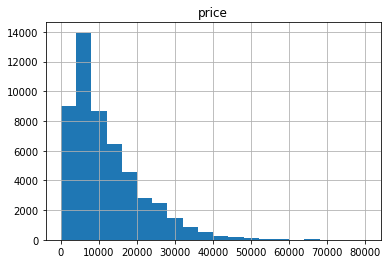

In [29]:
# Histogram harga kendaraan
df['price'].hist(bins=20, range=(0,80000))
plt.title('price')

**Parameter USIA KENDARAAN:**

Text(0.5, 1.0, 'age_car')

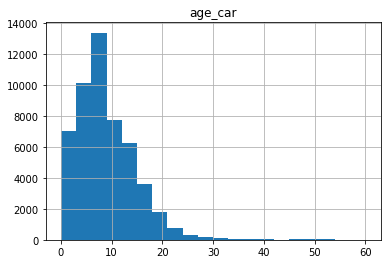

In [30]:
# Histogram usia kendaraan
df['age_car'].hist(bins=20, range=(0,60))
plt.title('age_car')


**Parameter ODOMETER:**

In [31]:
df['odometer'].describe()

count     51525.000000
mean     115162.352179
std       59909.264385
min           0.000000
25%       79181.000000
50%      113000.000000
75%      146541.000000
max      990000.000000
Name: odometer, dtype: float64

Text(0.5, 1.0, 'odometer')

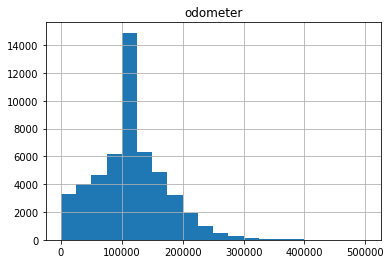

In [32]:
# Histogram jarak tempuh kendaraan
df['odometer'].hist(bins=20, range=(0,500000))
plt.title('odometer')


**Parameter JUMLAH SILINDER:**

Text(0.5, 1.0, 'cylinders')

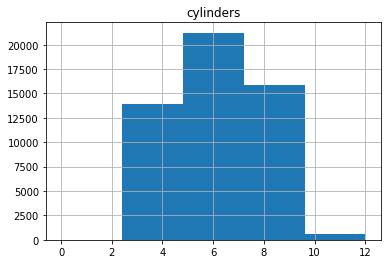

In [33]:
# Histogram jumlah silinder
df['cylinders'].hist(bins=5, range=(0,12))
plt.title('cylinders')


**Parameter CONDITION:**

Text(0.5, 1.0, 'condition')

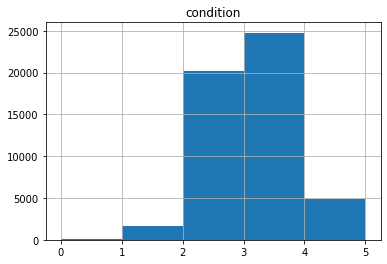

In [34]:
# Histogram kondisi kendaraan
df['condition'].hist(bins=5, range=(0,5))
plt.title('condition')


In [59]:
def upper_lower_whisker(df):
    Q1  = df.quantile(0.25)
    Q3  = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q1 + 1.5 * IQR

    return lower_whisker, upper_whisker

(-12758.5, 22758.5)

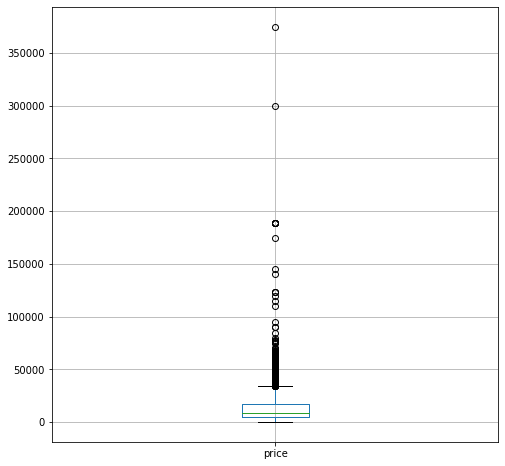

In [68]:
df.boxplot(column='price', figsize=(8,8))
upper_lower_whisker(df=df['price'])

(-8.0, 16.0)

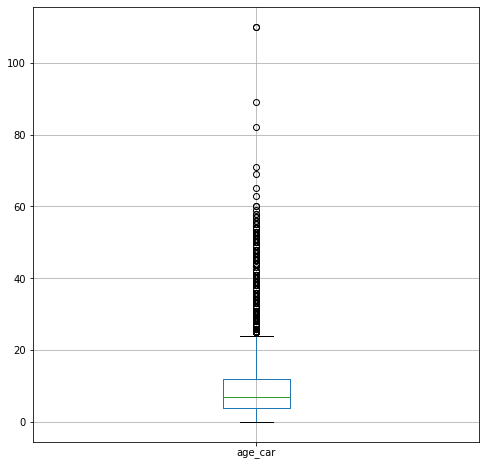

In [70]:
df.boxplot(column='age_car', figsize=(8,8))
upper_lower_whisker(df=df['age_car'])

(-21859.0, 180221.0)

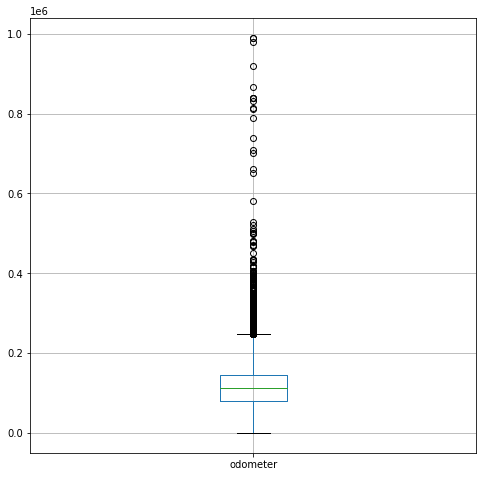

In [72]:
df.boxplot(column='odometer', figsize=(8,8))
upper_lower_whisker(df=df['odometer'])

### Mempelajari dan Menangani Outlier

Berdasarkan histogram yang sudah kita dapatkan, terdapat beberapa outlier yaitu di kolom 'price', 'age_car', 'odometer' karena terdapat nilai yang jauh di atas nilai normal. Sedangkan kolom lainnya tidak ada outlier.

In [35]:
# Tentukan batas bawah outlier 
df.query('price < 500 & age_car < 1 & odometer < 40000')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,age_car,avr_dist
3313,495,2018.0,ford focus,3,4.0,gas,36059.0,automatic,hatchback,NaN,False,2018-12-07,18,4,December,2018,0.0,inf
4738,69,2018.0,hyundai elantra,3,4.0,gas,28089.0,automatic,sedan,silver,False,2018-12-16,16,6,December,2018,0.0,inf
9176,1,2018.0,nissan rogue,3,4.0,gas,21855.0,automatic,suv,silver,False,2018-06-12,51,1,June,2018,0.0,inf
9180,1,2018.0,nissan maxima,3,6.0,gas,18004.0,automatic,sedan,custom,False,2018-07-27,10,4,July,2018,0.0,inf
9302,1,2018.0,ram 3500,3,6.0,gas,3047.0,automatic,truck,white,True,2018-10-07,33,6,October,2018,0.0,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48886,1,2018.0,ford f-150,3,8.0,gas,18362.0,automatic,truck,blue,True,2018-11-28,30,2,November,2018,0.0,inf
48968,1,2018.0,dodge charger,3,10.0,gas,2196.0,other,sedan,custom,True,2018-05-25,71,4,May,2018,0.0,inf
48972,1,2018.0,chevrolet silverado 1500,3,8.0,gas,20627.0,automatic,truck,white,True,2018-07-08,69,6,July,2018,0.0,inf
48973,1,2018.0,ford f-150,3,8.0,gas,31975.0,automatic,truck,NaN,True,2018-12-25,24,1,December,2018,0.0,inf


In [36]:
# Tentukan batas atas outlier 
df.query('price > 40000 & age_car > 30 & odometer < 270000')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,age_car,avr_dist
1587,51000,1967.0,chevrolet corvette,3,8.0,gas,66000.0,manual,coupe,blue,False,2019-02-14,95,3,February,2019,52.0,1269.230769
2834,49000,1965.0,ford mustang,3,8.0,gas,5160.0,manual,other,red,False,2019-02-27,57,2,February,2019,54.0,95.555556
3856,67500,1964.0,chevrolet corvette,3,8.0,gas,2800.0,manual,coupe,silver,False,2019-01-28,101,0,January,2019,55.0,50.909091
8830,45000,1970.0,chevrolet camaro,2,8.0,gas,82000.0,automatic,coupe,green,False,2019-04-09,34,1,April,2019,49.0,1673.469388
10185,47000,1969.0,chevrolet camaro,3,8.0,gas,54550.0,automatic,coupe,blue,False,2018-06-22,80,4,June,2018,49.0,1113.265306
10230,49995,1971.0,chevrolet corvette,4,8.0,gas,9400.0,manual,convertible,green,False,2018-09-27,34,3,September,2018,47.0,200.000000
13042,42500,1968.0,chevrolet camaro,5,8.0,gas,128.0,automatic,coupe,silver,False,2019-02-03,5,6,February,2019,51.0,2.509804
14929,55000,1963.0,chevrolet corvette,3,8.0,gas,48000.0,manual,convertible,red,False,2018-11-15,1,3,November,2018,55.0,872.727273
26456,49900,1973.0,chevrolet corvette,3,8.0,gas,19500.0,manual,convertible,red,False,2018-07-17,30,1,July,2018,45.0,433.333333
27490,60000,1969.0,chevrolet camaro,3,8.0,gas,39443.0,manual,coupe,yellow,False,2018-12-17,8,0,December,2018,49.0,804.959184


In [73]:
# Simpan data tanpa outlier dalam DataFrame yang terpisah
filtered_df = df.query('500 < price < 40000 & 1 < age_car < 30 & 40000 < odometer < 270000')
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42428 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         42428 non-null  int64         
 1   model_year    42428 non-null  float64       
 2   model         42428 non-null  object        
 3   condition     42428 non-null  object        
 4   cylinders     42428 non-null  float64       
 5   fuel          42428 non-null  object        
 6   odometer      42428 non-null  float64       
 7   transmission  42428 non-null  object        
 8   type          42428 non-null  object        
 9   paint_color   34808 non-null  object        
 10  is_4wd        42428 non-null  bool          
 11  date_posted   42428 non-null  datetime64[ns]
 12  days_listed   42428 non-null  int64         
 13  weekday       42428 non-null  int64         
 14  month         42428 non-null  object        
 15  year          42428 non-null  int64 

In [74]:
filtered_df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,age_car,avr_dist
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19,5,June,2018,7.0,20714.0
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,October,2018,7.0,12672.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,February,2019,6.0,18333.0
3,1500,2003.0,ford f-150,fair,8.0,gas,113000.0,automatic,pickup,NaN,False,2019-03-22,9,4,March,2019,16.0,7062.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,April,2019,2.0,40452.0


### Mempelajari Parameter Inti Tanpa Outlier

Sekarang kita akan membuat sebuah histogram data yang telah difilter dan membandingkannya dengan data sebelumnya yang masih ada outlier.

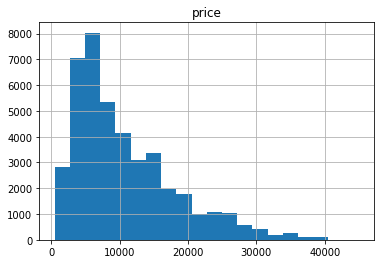

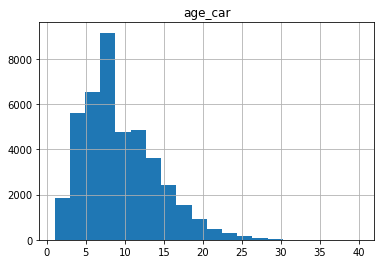

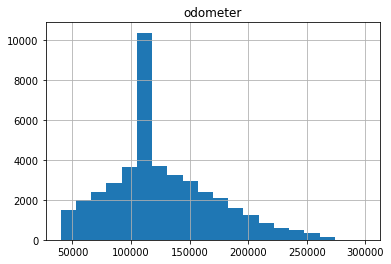

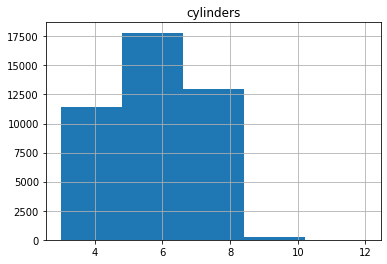

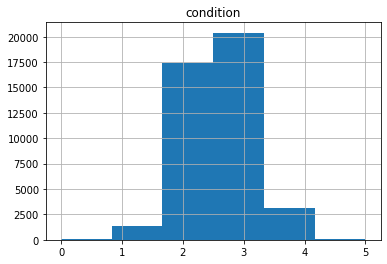

In [38]:
filtered_df['price'].hist(bins=20, range=(500,45000))
plt.title('price')
plt.show()

filtered_df['age_car'].hist(bins=20, range=(1,40))
plt.title('age_car')
plt.show()

filtered_df['odometer'].hist(bins=20, range=(40000,300000))
plt.title('odometer')
plt.show()

filtered_df['cylinders'].hist(bins=5)
plt.title('cylinders')
plt.show()

filtered_df['condition'].hist(bins=6)
plt.title('condition')
plt.show()


### Masa Berlaku Iklan 
Pada kolom 'days_listed' terdapat informasi mengenai lama tayang sebuah iklan, selanjutnya kita cari mean dan median.

In [39]:
filtered_df['days_listed'].describe()

count    42428.000000
mean        39.623032
std         28.311498
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

Kita mendapatkan mean sebesar 39 dan median 33. Selanjutnya kita plot.

Text(0.5, 1.0, 'days_listed')

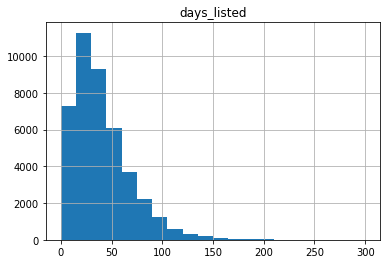

In [40]:
filtered_df['days_listed'].hist(bins=20, range=(0,300))
plt.title('days_listed')

<AxesSubplot:>

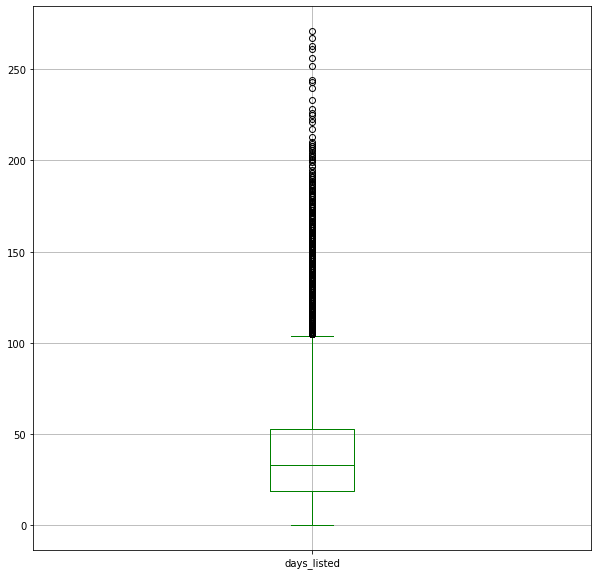

In [41]:
filtered_df.boxplot(column='days_listed', figsize=(10,10), color='green')

### Harga Rata-Rata Setiap Jenis Kendaraan

Selanjutnya kita akan menentukan harga rata-rata setiap jenis kendaraan. Kita akan menggunakan pivot table.

In [42]:
avr_price_vehicle = filtered_df.pivot_table(index='type', aggfunc='median', values='price')
avr_price_vehicle

,price
type,
bus,6997
convertible,9995
coupe,7995
hatchback,5800
mini-van,5997
offroad,11450
other,8550
pickup,12500
sedan,5900


In [75]:
car_count = filtered_df['type'].value_counts()
car_count

suv            10548
sedan          10207
truck          10148
pickup          5606
wagon           1383
coupe           1342
mini-van        1052
hatchback        871
van              548
convertible      315
other            210
offroad          184
bus               14
Name: type, dtype: int64

Sekarang kita gabungkan tabel 'price' dan 'type'.

In [44]:
type_stat = avr_price_vehicle.join(car_count)
type_stat.columns = ['price', 'amount']
type_stat = type_stat.sort_values('amount', ascending=False)
type_stat

,price,amount
type,,
suv,8200,10548
sedan,5900,10207
truck,14490,10148
pickup,12500,5606
wagon,7500,1383
coupe,7995,1342
mini-van,5997,1052
hatchback,5800,871
van,7970,548


Dari hasil penghitungan di atas, didapatkan kesimpulan bahwa mobil SUV dan SEDAN adalah paling populer. Sekarang kita fokus pada dua jenis mobil tersebut.

In [77]:
suv_df = filtered_df.query('type == "suv"')
suv_df = suv_df[['price', 'age_car', 'odometer', 'condition', 'transmission', 'paint_color']]
suv_df = suv_df.reset_index(drop=True)
suv_df.corr()

,price,age_car,odometer
price,1.000000,-0.585626,-0.527419
age_car,-0.585626,1.000000,0.477811
odometer,-0.527419,0.477811,1.000000


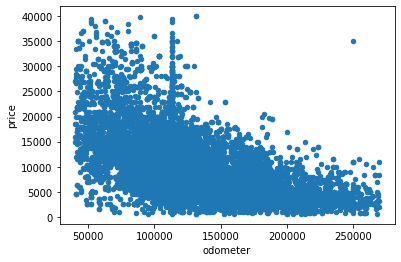

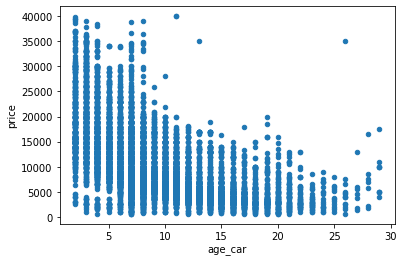

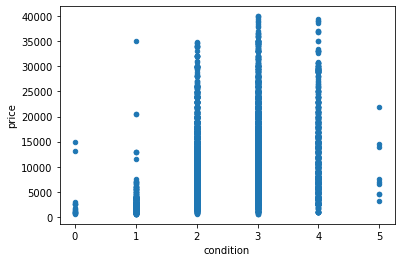

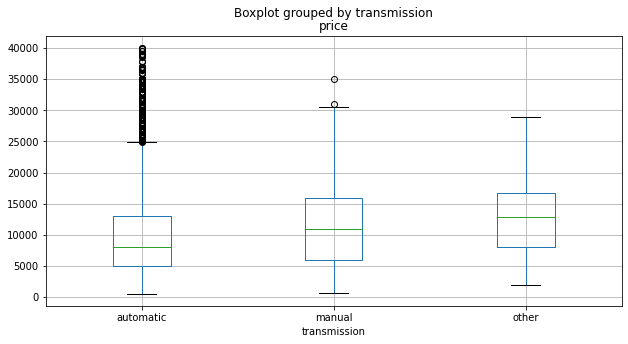

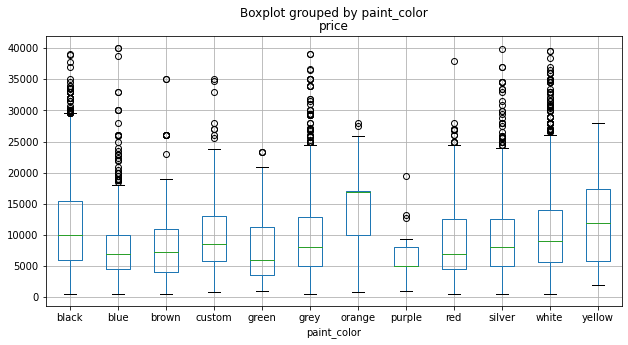

In [58]:
suv_df.plot(x = 'odometer', y='price', kind = 'scatter')
plt.show()
suv_df.plot(x = 'age_car', y='price', kind = 'scatter')
plt.show()
suv_df.plot(x = 'condition', y='price', kind = 'scatter')
plt.show()
suv_df.boxplot(column='price', by='transmission', figsize=(10, 5))
plt.show()
suv_df.boxplot(column='price', by='paint_color', figsize=(10, 5))
plt.show()

In [62]:
sedan_df = filtered_df.query('type == "sedan"')
sedan_df = sedan_df[['price', 'age_car', 'odometer', 'condition', 'transmission', 'paint_color']]
sedan_df = sedan_df.reset_index(drop=True)
sedan_df.head()

,price,age_car,odometer,condition,transmission,paint_color
0,5500,6.0,110000.0,4,automatic,red
1,14900,2.0,80903.0,3,automatic,black
2,14990,4.0,57954.0,3,automatic,black
3,12990,3.0,79212.0,3,automatic,white
4,8990,7.0,111142.0,3,automatic,grey


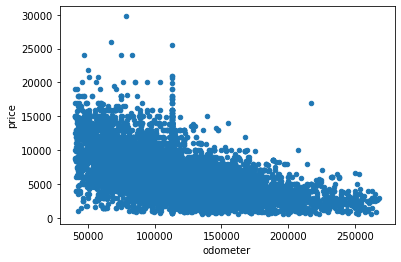

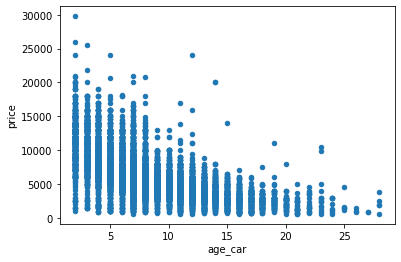

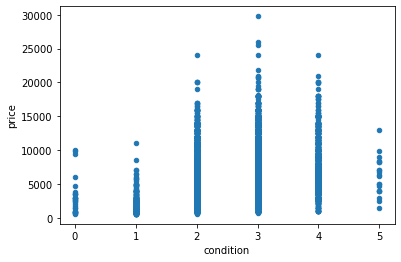

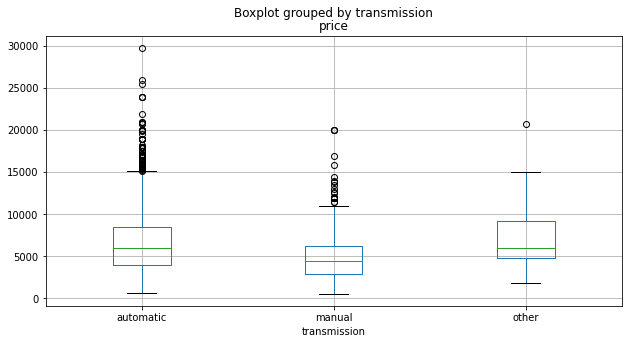

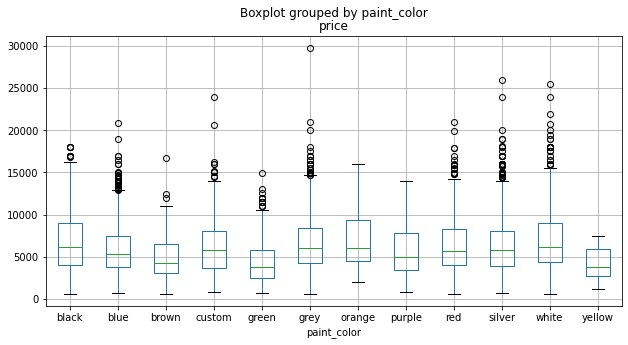

In [63]:
sedan_df.plot(x = 'odometer', y='price', kind = 'scatter')
plt.show()
sedan_df.plot(x = 'age_car', y='price', kind = 'scatter')
plt.show()
sedan_df.plot(x = 'condition', y='price', kind = 'scatter')
plt.show()
sedan_df.boxplot(column='price', by='transmission', figsize=(10, 5))
plt.show()
sedan_df.boxplot(column='price', by='paint_color', figsize=(10, 5))
plt.show()

### Faktor Harga

In [64]:
suv_df.corr()

,price,age_car,odometer
price,1.000000,-0.585626,-0.527419
age_car,-0.585626,1.000000,0.477811
odometer,-0.527419,0.477811,1.000000


In [65]:
sedan_df.corr()

,price,age_car,odometer
price,1.000000,-0.645975,-0.538316
age_car,-0.645975,1.000000,0.478278
odometer,-0.538316,0.478278,1.000000



Dari tabel korelasi diatas bisa diambil kesimpulan bahwa umur mobil sangat memengaruhi harga , kemudian diikuti jarak tempuh mobil (odometer). Kemudian dari boxplot, warna kuning menjadi yang paling banyak ditemukan untuk kategori mobil SUV. Sedangkan warna orange paling banyak ditemukan pada mobil SEDAN.

## 4. Kesimpulan
Kita telah melakukan plot data asli dan data yang telah difilter dari outlier, kemudian kita mencari dua jenis kendaraan terbanyak yaitu SUV dan SEDAN. Dari boxplot dan plot yang telah dilakukan, didapatkan kesimpulan bahwa faktor-faktor yang memengaruhi harga mobil adalah umur mobil, diikuti jarak tempuh mobil (odometer). Untuk SUV, warna kuning menjadi harga tipikal. Untuk mobil sedan menjadi tipe populer kedua dari data kita dan warna orange menjadi warna yang paling disukai.